In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import io
%matplotlib inline

In [2]:
df=pd.read_csv('stock.csv')
df.head()

FileNotFoundError: ignored

In [0]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1003,2019-03-04,21.520000,21.610001,21.320000,21.389999,21.389999,103900
1004,2019-03-05,21.410000,21.650000,21.280001,21.549999,21.549999,110900
1005,2019-03-06,21.480000,21.480000,20.660000,20.780001,20.780001,94700
1006,2019-03-07,20.809999,20.809999,20.340000,20.570000,20.570000,95800
1007,2019-03-08,20.410000,21.100000,20.410000,20.990000,20.990000,138000


In [0]:
closing_data=df['Close'].values
closing_data

array([23.9     , 23.950001, 24.059999, ..., 20.780001, 20.57    ,
       20.99    ])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(closing_data.reshape(-1,1))

In [0]:
len(scaled_data)

1008

<function matplotlib.pyplot.show(*args, **kw)>

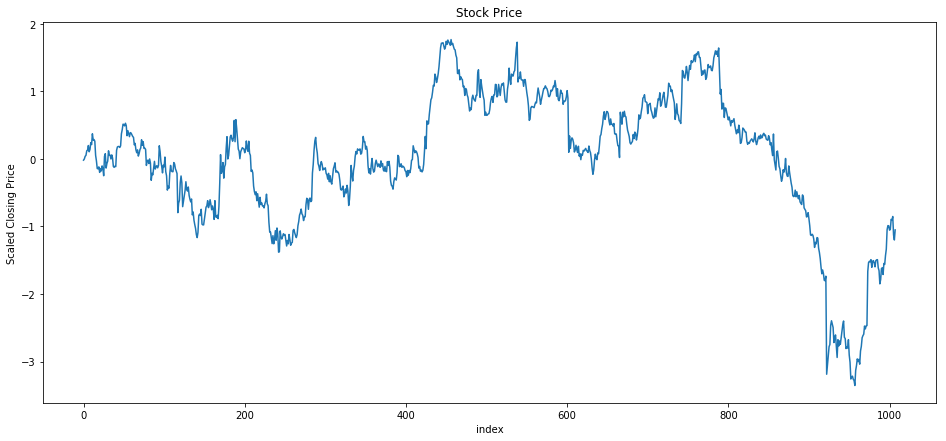

In [0]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_data)
plt.xlabel('index')
plt.ylabel('Scaled Closing Price')
plt.title('Stock Price')
plt.show

In [0]:
def window_data(data,w):
    X=[]
    y=[]
    
    i=0
    while (i+w)<=len(data)-1:
        X.append(data[i:i+w])
        y.append(data[i+w])
        
        i=i+1
        assert len(X)==len(y)
    return X,y

In [0]:
X,y=window_data(scaled_data,8)

In [0]:
X

[array([[-0.02028642],
        [-0.00254776],
        [ 0.0364758 ],
        [ 0.0506668 ],
        [ 0.11807272],
        [ 0.12871535],
        [ 0.19612091],
        [ 0.10388172]]), array([[-0.00254776],
        [ 0.0364758 ],
        [ 0.0506668 ],
        [ 0.11807272],
        [ 0.12871535],
        [ 0.19612091],
        [ 0.10388172],
        [ 0.13935833]]), array([[0.0364758 ],
        [0.0506668 ],
        [0.11807272],
        [0.12871535],
        [0.19612091],
        [0.10388172],
        [0.13935833],
        [0.23869249]]), array([[0.0506668 ],
        [0.11807272],
        [0.12871535],
        [0.19612091],
        [0.10388172],
        [0.13935833],
        [0.23869249],
        [0.2103112 ]]), array([[0.11807272],
        [0.12871535],
        [0.19612091],
        [0.10388172],
        [0.13935833],
        [0.23869249],
        [0.2103112 ],
        [0.36995631]]), array([[0.12871535],
        [0.19612091],
        [0.10388172],
        [0.13935833],
        [0.

In [0]:
y

[array([0.13935833]),
 array([0.23869249]),
 array([0.2103112]),
 array([0.36995631]),
 array([0.27771712]),
 array([0.28481244]),
 array([0.25997917]),
 array([0.0506668]),
 array([-0.03092905]),
 array([-0.14445492]),
 array([-0.14800187]),
 array([-0.11962058]),
 array([-0.20121749]),
 array([-0.14445492]),
 array([-0.17993082]),
 array([-0.10543029]),
 array([-0.14090725]),
 array([-0.2508844]),
 array([0.0364758]),
 array([0.07550043]),
 array([-0.13735924]),
 array([-0.06995368]),
 array([-0.03447671]),
 array([0.11807272]),
 array([0.05421482]),
 array([0.05421482]),
 array([-0.00254776]),
 array([0.05776248]),
 array([0.01164253]),
 array([-0.11252596]),
 array([-0.12671625]),
 array([-0.10897795]),
 array([-0.11607363]),
 array([0.12516733]),
 array([0.1748353]),
 array([0.18192991]),
 array([0.18192991]),
 array([0.16773962]),
 array([0.19257325]),
 array([0.36995631]),
 array([0.43026655]),
 array([0.51186276]),
 array([0.50831474]),
 array([0.48702913]),
 array([0.52605376]

In [0]:
X_train=np.array(X[:807])
y_train=np.array(y[:807])

In [0]:
X_test=np.array(X[807:])
y_test=np.array(y[807:])

In [0]:
X_train.shape

(807, 8, 1)

In [0]:
X_test.shape

(193, 8, 1)

In [0]:
y_train.shape

(807, 1)

In [0]:
y_test.shape

(193, 1)

In [0]:
b = 8 #b is batch size
w = 8 # w is window size
h = 200 #h is hidden layer
clip_margin = 4 
learning_rate = 0.001 
epochs = 200

In [0]:
inputs = tf.placeholder(tf.float32, [b, w, 1])
targets = tf.placeholder(tf.float32, [b, 1])

In [0]:
#Weights for the input gate
weights_input_gate = tf.Variable(tf.truncated_normal([1, h], stddev=0.05))
weights_input_hidden = tf.Variable(tf.truncated_normal([h, h], stddev=0.05))
bias_input = tf.Variable(tf.zeros([h]))

#weights for the forgot gate
weights_forget_gate = tf.Variable(tf.truncated_normal([1, h], stddev=0.05))
weights_forget_hidden = tf.Variable(tf.truncated_normal([h, h], stddev=0.05))
bias_forget = tf.Variable(tf.zeros([h]))

#weights for the output gate
weights_output_gate = tf.Variable(tf.truncated_normal([1, h], stddev=0.05))
weights_output_hidden = tf.Variable(tf.truncated_normal([h, h], stddev=0.05))
bias_output = tf.Variable(tf.zeros([h]))

#weights for the memory cell
weights_memory_cell = tf.Variable(tf.truncated_normal([1, h], stddev=0.05))
weights_memory_cell_hidden = tf.Variable(tf.truncated_normal([h, h], stddev=0.05))
bias_memory_cell = tf.Variable(tf.zeros([h]))

#Output layer weigts
weights_output = tf.Variable(tf.truncated_normal([h, 1], stddev=0.05))
bias_output_layer = tf.Variable(tf.zeros([1]))

In [0]:
def LSTM_cell(input, output, state):
    
    input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
    forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
    output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
    memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
    state = state * forget_gate + input_gate * memory_cell
    output = output_gate * tf.tanh(state)
    return state, output

In [0]:
outputs = []
for i in range(b): 
  
    batch_state = np.zeros([1, h], dtype=np.float32) 
    batch_output = np.zeros([1, h], dtype=np.float32)
    
    for j in range(w):
        batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][j], (-1, 1)),
                                              batch_state, batch_output)
        
    outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)
outputs

[<tf.Tensor 'add_656:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_729:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_802:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_875:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_948:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1021:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1094:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_1167:0' shape=(1, 1) dtype=float32>]

In [0]:
losses = []

for i in range(len(outputs)):
    losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)),
                                               outputs[i]))
    
loss = tf.reduce_mean(losses)

In [0]:
#we define optimizer with gradient clipping
gradients = tf.gradients(loss, tf.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
optimizer = tf.train.AdamOptimizer(learning_rate)
trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))

In [0]:
session = tf.Session()
session.run(tf.global_variables_initializer())
for i in range(epochs):
    traind_scores = []
    j = 0
    epoch_loss = []
    while(j + b) <= len(X_train):
        X_batch = X_train[j:j+b]
        y_batch = y_train[j:j+b]
        o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
        epoch_loss.append(c)
        traind_scores.append(o)
        j += b
    if (i % 40) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/200  Current loss: 0.09508194029331207
Epoch 40/200  Current loss: 0.01598675735294819
Epoch 80/200  Current loss: 0.015596196986734867
Epoch 120/200  Current loss: 0.014485039748251438
Epoch 160/200  Current loss: 0.013005262240767479


In [0]:
sup =[]
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j][0])

In [0]:
tests = []
i = 0
while i+b <= len(X_test): 
    o = session.run([outputs],feed_dict={inputs:X_test[i:i+b]})
    i += b
    tests.append(o)

In [0]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [0]:
tests

[[[array([[0.57436013]], dtype=float32),
   array([[0.35128453]], dtype=float32),
   array([[0.23770472]], dtype=float32),
   array([[0.33380195]], dtype=float32),
   array([[0.51242125]], dtype=float32),
   array([[0.5223434]], dtype=float32),
   array([[0.48095897]], dtype=float32),
   array([[0.44291312]], dtype=float32)]],
 [[array([[0.43760544]], dtype=float32),
   array([[0.2990005]], dtype=float32),
   array([[0.18810537]], dtype=float32),
   array([[0.2576046]], dtype=float32),
   array([[0.3015628]], dtype=float32),
   array([[0.3408489]], dtype=float32),
   array([[0.32825565]], dtype=float32),
   array([[0.37225202]], dtype=float32)]],
 [[array([[0.31705302]], dtype=float32),
   array([[0.256583]], dtype=float32),
   array([[0.2792744]], dtype=float32),
   array([[0.37712854]], dtype=float32),
   array([[0.37075633]], dtype=float32),
   array([[0.24588525]], dtype=float32),
   array([[0.18384783]], dtype=float32),
   array([[0.3364079]], dtype=float32)]],
 [[array([[0.376446

In [0]:
tests_new

[array([[0.57436013]], dtype=float32),
 array([[0.35128453]], dtype=float32),
 array([[0.23770472]], dtype=float32),
 array([[0.33380195]], dtype=float32),
 array([[0.51242125]], dtype=float32),
 array([[0.5223434]], dtype=float32),
 array([[0.48095897]], dtype=float32),
 array([[0.44291312]], dtype=float32),
 array([[0.43760544]], dtype=float32),
 array([[0.2990005]], dtype=float32),
 array([[0.18810537]], dtype=float32),
 array([[0.2576046]], dtype=float32),
 array([[0.3015628]], dtype=float32),
 array([[0.3408489]], dtype=float32),
 array([[0.32825565]], dtype=float32),
 array([[0.37225202]], dtype=float32),
 array([[0.31705302]], dtype=float32),
 array([[0.256583]], dtype=float32),
 array([[0.2792744]], dtype=float32),
 array([[0.37712854]], dtype=float32),
 array([[0.37075633]], dtype=float32),
 array([[0.24588525]], dtype=float32),
 array([[0.18384783]], dtype=float32),
 array([[0.3364079]], dtype=float32),
 array([[0.37644675]], dtype=float32),
 array([[0.34214073]], dtype=float

In [0]:
test_results = []
for i in range(1000):
    if i >= 808:
        test_results.append(tests_new[i-808])
    else:
        test_results.append(None)

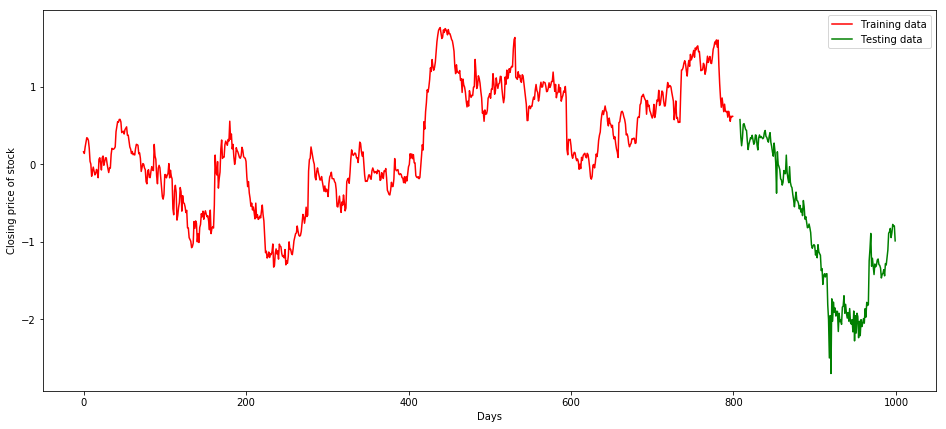

In [0]:
plt.figure(figsize=(16, 7))
plt.plot(sup,'r',label='Training data')
plt.plot(test_results,'g', label='Testing data')
plt.xlabel('Days')
plt.ylabel('Closing price of stock')
plt.legend()
plt.show()

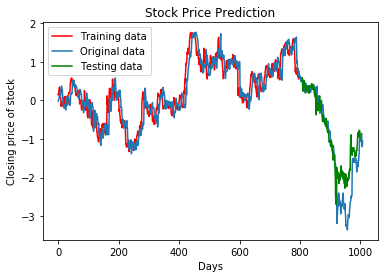

In [0]:
#plt.figure(figsize=(16, 7))
plt.plot(sup,'r',label='Training data')
plt.plot(scaled_data,label='Original data')
plt.plot(test_results,'g', label='Testing data')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Closing price of stock')
plt.legend()
plt.show()